In [1]:
## https://www.quantstart.com/articles/Basics-of-Statistical-Mean-Reversion-Testing-Part-II/
# cadf.py
import quandl
quandl.ApiConfig.api_key = "wr7gypeqAy_yx8WWETfw"
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from pandas_datareader.data import DataReader
import pprint
import statsmodels.tsa.stattools as ts

from statsmodels.formula.api import ols

/opt/conda/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# cadf.py

def plot_price_series(df, ts1, ts2, start, end):
    months = mdates.MonthLocator()  # every month
    fig, ax = plt.subplots()
    ax.plot(df.index, df[ts1], label=ts1)
    ax.plot(df.index, df[ts2], label=ts2)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.set_xlim(start, end)
    ax.grid(True)
    fig.autofmt_xdate()

    plt.xlabel('Month/Year')
    plt.ylabel('Price ($)')
    plt.title('%s and %s Daily Prices' % (ts1, ts2))
    plt.legend()
    plt.show()

In [3]:
# cadf.py

def plot_scatter_series(df, ts1, ts2):
    plt.xlabel('%s Price ($)' % ts1)
    plt.ylabel('%s Price ($)' % ts2)
    plt.title('%s and %s Price Scatterplot' % (ts1, ts2))
    plt.scatter(df[ts1], df[ts2])
    plt.show()

In [4]:
# cadf.py

def plot_residuals(df):
    months = mdates.MonthLocator()  # every month
    fig, ax = plt.subplots()
    ax.plot(df.index, df["res"], label="Residuals")
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.set_xlim(datetime(2012, 2, 1), datetime(2013, 1, 1))
    ax.grid(True)
    fig.autofmt_xdate()

    plt.xlabel('Month/Year')
    plt.ylabel('Price ($)')
    plt.title('Residual Plot')
    plt.legend()

    plt.plot(df["res"])
    plt.show()

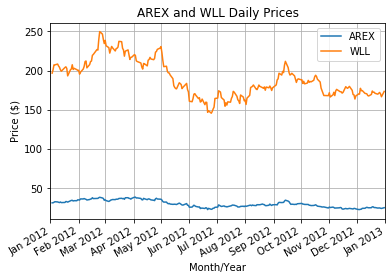

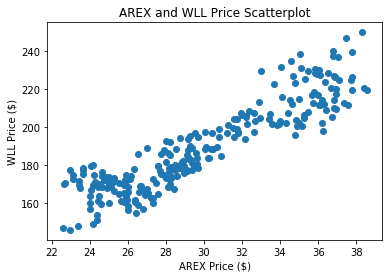

Intercept    49.440135
AREX          4.676268
dtype: float64


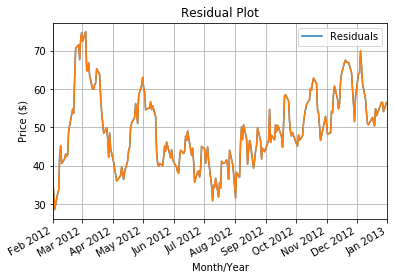

(-2.9605246158181635,
 0.03874899191920418,
 0,
 249,
 {'1%': -3.4568881317725864,
  '10%': -2.5729936189738876,
  '5%': -2.8732185133016057},
 1247.9550428806795)


In [5]:
# cadf.py

if __name__ == "__main__":
    start = datetime(2012, 1, 1)
    end = datetime(2013, 1, 1)

    arex = quandl.get("WIKI/AREX", start_date=start, end_date=end)
    wll = quandl.get("WIKI/WLL", start_date=start, end_date=end)

    df = pd.DataFrame(index=arex.index)
    df["AREX"] = arex["Adj. Close"]
    df["WLL"] = wll["Adj. Close"]

    # Plot the two time series
    plot_price_series(df, "AREX", "WLL", start, end)

    # Display a scatter plot of the two time series
    plot_scatter_series(df, "AREX", "WLL")

    # Calculate optimal hedge ratio "beta"
    model = ols(formula = 'WLL ~ AREX',data = df).fit()
    beta_hr = model.params[1]
    print(model.params)

    # Calculate the residuals of the linear combination
    df["res"] = df["WLL"] - beta_hr*df["AREX"]

    # Plot the residuals
    plot_residuals(df)

    # Calculate and output the CADF test on the residuals
    cadf = ts.adfuller(df["res"])
    pprint.pprint(cadf)